In [1]:
import Plotter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

pd.options.mode.copy_on_write = True
color_vp = "#404A99"
data = pd.read_excel('plot_data\\Tablas.xlsx', sheet_name=None)
sheets = list(data.keys())

fondos = data[sheets[0]].copy()
fondos = fondos.dropna(axis = 1, how='all').dropna(axis=0,how = 'any')
fondos.columns = fondos.iloc[0,:]
fondos = fondos.iloc[1:,:]

siglas = ['FONE','FASSA','FAIS','FORTAMUN','FAM','FAETA','FASP','FAFEF','TOTAL']

fondos['Fondo'] = siglas
fondos.set_index('Fondo',drop=True, inplace=True)
fondos_mt = fondos.iloc[:-1,:]
fondos_mt['%'] = 100 * fondos_mt['%']

def divide_in_ms(df, col, nd):
    """
    Para valores con contexto monetario.\n
    Factorizar en potencias de 1000.
    """
    pot = 1000 ** nd
    mstr  ='M' * nd
    df[f'{col}_{mstr}'] = df[col] / pot
    df[f'{col}_{mstr}'] = df[f'{col}_{mstr}'].agg(lambda x: round(x, 2))
    return df

fondos_mt = divide_in_ms(fondos_mt, 'Monto', 3)
fondos_mt

2,Monto,%,Monto_MMM
Fondo,,,
FONE,424326249225,51.105197,424.33
FASSA,117537248258,14.156004,117.54
FAIS,94321009825,11.359876,94.32
FORTAMUN,95547846713,11.507635,95.55
FAM,30353958250,3.655784,30.35
FAETA,8019426362,0.965847,8.02
FASP,7988049749,0.962068,7.99
FAFEF,52205825000,6.287589,52.21


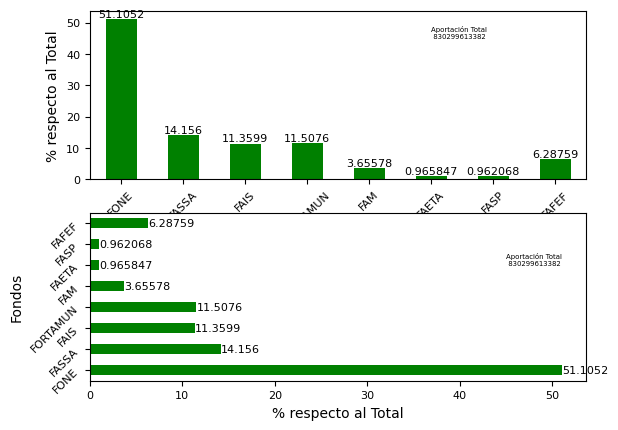

In [2]:
import matplotlib.pyplot as plt
fig1, ax = plt.subplots(2)
fondos_mt['%'].plot(kind='bar',rot=45, color = 'g',
                         xlabel='Fondos', ylabel='%' + ' respecto al Total',fontsize=8, ax = ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container, fontsize = 8)

fondos_mt['%'].plot(kind='barh',rot=45, color = 'g',
                         ylabel='Fondos', xlabel='%' + ' respecto al Total',fontsize=8, ax = ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, fontsize = 8)

ax[0].text(x = 5, y = 45, s = f'Aportación Total \n {fondos.iloc[-1,0]}',fontsize = 5)
ax[1].text(x = 45, y = 5, s = f'Aportación Total \n {fondos.iloc[-1,0]}',fontsize = 5)
plt.show()

100.0


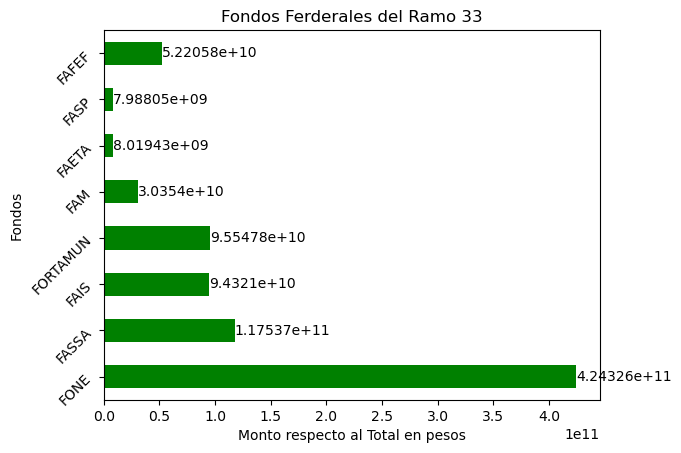

In [3]:
import matplotlib.pyplot as plt
print(fondos_mt['%'].sum())
fig1, ax = plt.subplots()
ax = fondos_mt['Monto'].plot(kind='barh',rot=45,
                         title='Fondos Ferderales del Ramo 33', color = 'g',
                         ylabel='Fondos', xlabel='Monto' + ' respecto al Total en pesos')
for container in ax.containers:
    ax.bar_label(container)

# ax.text(x = 1, y = 1, s = f'Aportación Total \n {fondos.iloc[-1,0]}')
plt.show()


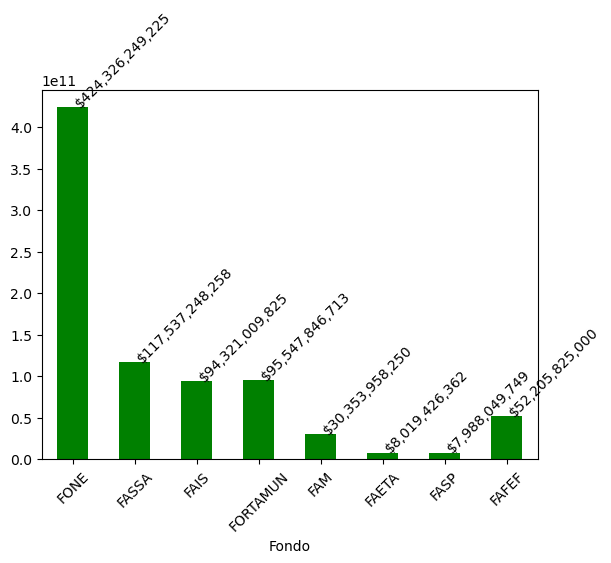

In [4]:

def money_format(num):
    u = []
    print(len(num))
    g = len(num) // 3
    if len(num) // 3 != 0:
        g = g + 1
    for i in range(g - 1):
        if i == 0:
            u.append(num[-3 * (i + 1):])
        else:
            u.append(num[-3 * (i + 1):-3 * (i)])
    return u


df= fondos_mt
ax = df['Monto'].plot(kind='bar', color='g', rot = 45) 
x_offset = 0
y_offset = -11
for p in ax.patches:
    b = p.get_bbox()
    val = "${:,.0f}".format(b.y1 + b.y0)
    ax.annotate(val, ((b.x0 + b.x1)/2 + x_offset, b.y1 + y_offset), rotation = 45)